The dataset named Video Game Sales with Ratings contains a collection of more than 16000 data which lists video games with sales above 100,000 copy.

* **Name** : Name of the game
* **Platform** : Console on which the game is running
* **Year_of_Release** : Year of the game released
* **Genre** : Game's category
* **Publisher** : Publisher
* **NA_Sales** : Game sales in North America (in millions of units)
* **EU_Sales** : Game sales in the European Union (in millions of units)
* **JP_Sales** : Game sales in Japan (in millions of units)
* **Other_Sales** : Game sales in the rest of the world
* **Global_Sales** : Total sales in the world (in millions of units)
* **Critic_Score** : Aggregate score compiled by Metacritic staff
* **Critic_Count** : The number of critics used in coming up with the Critic_score
* **User_Score** : Score by Metacritic's subscribers
* **User_Count** : Number of Metacritic's subscribers who gave the user_score
* **Developer** : Party responsible for creating the game
* **Rating** : The ESRB ratings

# Video Game Sales Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

games = pd.read_csv("/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv")
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [2]:
games.info()
games.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

#### 1. Drop Data

In [3]:
#Drop unused column

games.drop(['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1, inplace=True)

In [4]:
games.isna().sum()

Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
# Drop NaN

games.dropna(inplace=True)

In [6]:
# Convert User_Score to Float
games['User_Score'] = pd.to_numeric(games['User_Score'])
games['Year_of_Release']=pd.to_numeric(games['Year_of_Release'])

#### 2. Grouping Platform

In [7]:
print("type of platform:", games['Platform'].unique())

type of platform: ['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']


In [8]:
# Create new column
games['Platform_General']= games['Platform']

# Group platform in new column
games.loc[games['Platform'] == 'Wii', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'DS', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'X360', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PS3', 'Platform_General'] = 'Sony_Playstation' 
games.loc[games['Platform'] == 'PS2', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == '3DS', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'PS4', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'PS', 'Platform_General'] = 'Sony_Playstation' 
games.loc[games['Platform'] == 'XB', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PC', 'Platform_General'] = 'PC'
games.loc[games['Platform'] == 'PSP', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'WiiU', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'GC', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'GBA', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'XOne', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PSV', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'DC', 'Platform_General'] = 'Sega'

In [9]:
games.head()
games["Platform_General"].unique()

array(['Nintendo', 'Microsoft_Xbox', 'Sony_Playstation', 'PC', 'Sega'],
      dtype=object)

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Platform          6825 non-null   object 
 1   Year_of_Release   6825 non-null   float64
 2   Genre             6825 non-null   object 
 3   Publisher         6825 non-null   object 
 4   Global_Sales      6825 non-null   float64
 5   Critic_Score      6825 non-null   float64
 6   Critic_Count      6825 non-null   float64
 7   User_Score        6825 non-null   float64
 8   User_Count        6825 non-null   float64
 9   Developer         6825 non-null   object 
 10  Rating            6825 non-null   object 
 11  Platform_General  6825 non-null   object 
dtypes: float64(6), object(6)
memory usage: 693.2+ KB


In [11]:
games = games.reset_index(drop=True)

In [12]:
games.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_General
0,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Nintendo
1,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Nintendo
2,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,Nintendo,E,Nintendo
3,DS,2006.0,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,Nintendo,E,Nintendo
4,Wii,2006.0,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Nintendo


## Data Visualization
The goal here is to gain some intuitions of the magnitude of video game sales and its evolution throughout the period of time covered by the data set.


        Total Number  Percentage
1985.0             1        0.01
1988.0             1        0.01
1992.0             1        0.01
1994.0             1        0.01
1996.0             7        0.10
1997.0            13        0.19
1998.0            25        0.37
1999.0            30        0.44
2000.0           102        1.49
2001.0           256        3.75
2002.0           455        6.67
2003.0           498        7.30
2004.0           476        6.97
2005.0           562        8.23
2006.0           528        7.74
2007.0           590        8.64
2008.0           592        8.67
2009.0           550        8.06
2010.0           429        6.29
2011.0           453        6.64
2012.0           313        4.59
2013.0           266        3.90
2014.0           253        3.71
2015.0           211        3.09
2016.0           212        3.11


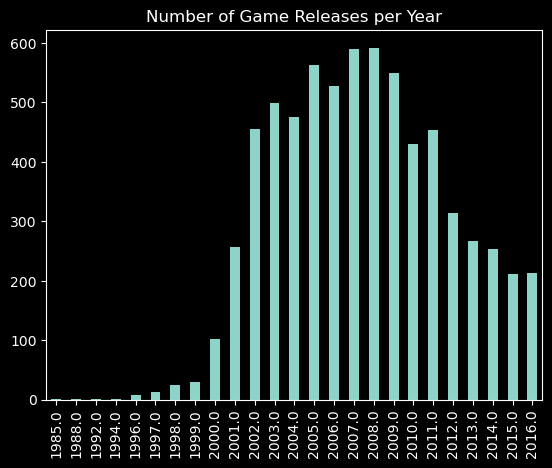

In [13]:
plt.style.use('dark_background')

count = games['Year_of_Release'].value_counts().sort_index()
percent = 100*games['Year_of_Release'].value_counts(normalize=True)
df = pd.DataFrame({'Total Number':count, 'Percentage':percent.round(2)})
print(df)
count.plot(kind='bar', title="Number of Game Releases per Year");


              Total Number  Percentage
Action                1630       23.88
Sports                 943       13.82
Shooter                864       12.66
Role-Playing           712       10.43
Racing                 581        8.51
Platform               403        5.90
Misc                   384        5.63
Fighting               378        5.54
Simulation             297        4.35
Strategy               267        3.91
Adventure              248        3.63
Puzzle                 118        1.73


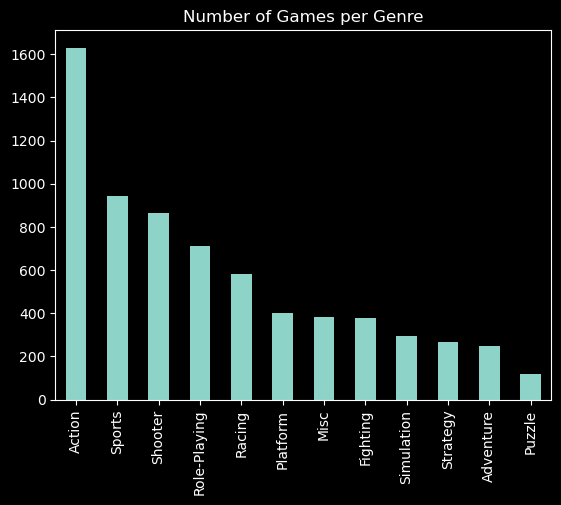

In [14]:
plt.style.use('dark_background')
count = games['Genre'].value_counts()
percent = 100*games['Genre'].value_counts(normalize=True)
df = pd.DataFrame({'Total Number':count, 'Percentage':percent.round(2)})
print(df)
count.plot(kind='bar', title="Number of Games per Genre");

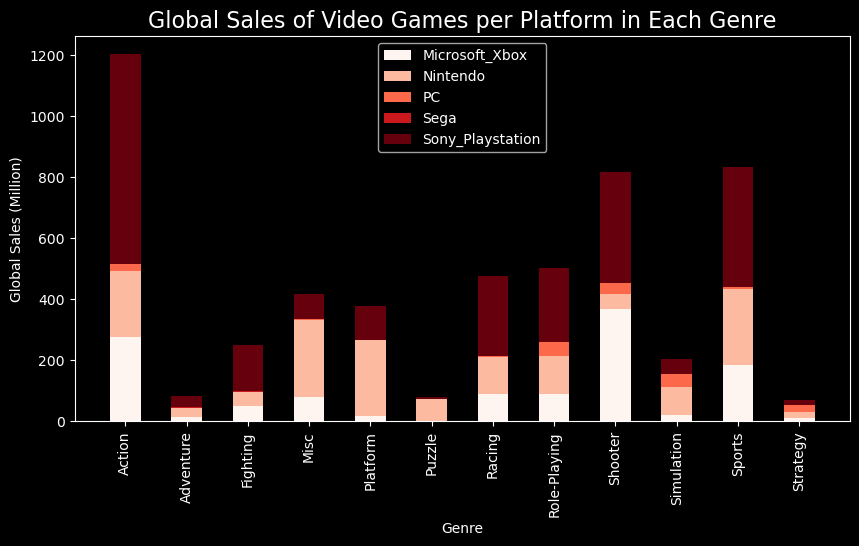

In [15]:
plt.style.use('dark_background')

df = games.groupby(['Genre','Platform_General']).Global_Sales.sum()
df.unstack().plot.bar(stacked=True, linewidth=0, figsize=(10,5), colormap= 'Reds')
plt.title('Global Sales of Video Games per Platform in Each Genre', size=16)
plt.ylabel('Global Sales (Million)')
plt.xlabel('Genre')
plt.legend(loc=9, prop={'size': 10})
plt.autoscale()
plt.show()

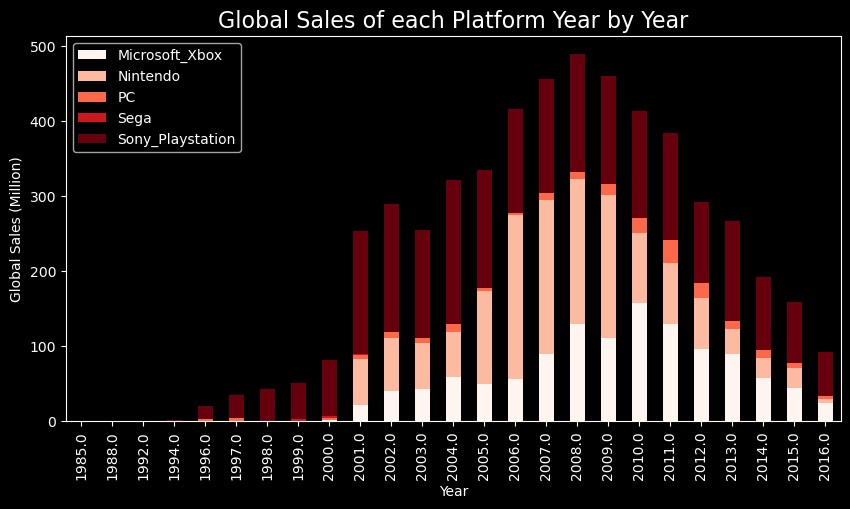

In [16]:
plt.style.use('dark_background')
df = games.groupby(['Year_of_Release','Platform_General']).Global_Sales.sum()
df.unstack().plot.bar(stacked=True, linewidth=0, figsize=(10,5), colormap= 'Reds')
plt.title('Global Sales of each Platform Year by Year', size=16)
plt.ylabel('Global Sales (Million)')
plt.xlabel('Year')
plt.legend(loc=2, prop={'size': 10})
plt.show()

## Predictive Analysis (on Global Sales)